In [28]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import gc
from environments.stock_env import StockEnvironment
from data_processing.feature_generation import FeatureGenerator
from data_processing.csv_reader import CSVReader
from data_processing.y_finance_reader import  YahooFinanceReader
import os

import sys

sys.path.append("C:/Users/YuweiZhu/OneDrive - Alloyed/Documents/Market-Prediction-Research/")
sys.path.append("C:/Users/YuweiZhu/OneDrive - Alloyed/Documents/Market-Prediction-Research/terminal")

In [15]:
%reload_ext autoreload
%autoreload 2

In [11]:
gc.collect()
torch.cuda.empty_cache()


In [12]:
torch.cuda.is_available()

True

In [32]:
# reader = YahooFinanceReader()
# aapl = reader.read_stock_price_data("AAPL")
# aapl

In [33]:
# feat_gen  = FeatureGenerator(aapl, task="classification", target_variable="Close")
# X_train, X_test, y_train, y_test = feat_gen.create_modelling_data(features=["Close"], target="Profit")

# DQN Agent from personal library

In [13]:
from models.deep_q_agent import DQNAgent
from models.deep_dynaq_agent import DynaDQNAgent

c:\Users\YuweiZhu\anaconda3\envs\terminal\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [84]:
agent = DQNAgent(double_dqn=True,
                    target_net_update='soft',
                    tau=0.005,
                    hard_update_interval=1000,
                    mem_length=10000,
                    eps_start=1.0,
                    eps_end=0.05,
                    eps_decay_length=1000,
                    environment='AAPL',
                    gradient_clipping=-1,
                    gradient_norm_clipping=1,
                    activation='gelu',
                    hidden_size_1=128,
                    hidden_size_2=128)

The following derived features are in use:  ['7 day simple moving average', '7 day moving deviation', '7 day lower bband', '7 day upper bband', '7 day simple moving average', '14 day simple moving average', '30 day simple moving average', '100 day simple moving average', '7 day ema', '14 day ema', '30 day ema', '100 day ema', '26 day ema', '12 day ema', '26/12 macd', '26/12 macd 9 day signal']


test score: 0.5900621118012422


<Figure size 640x480 with 0 Axes>

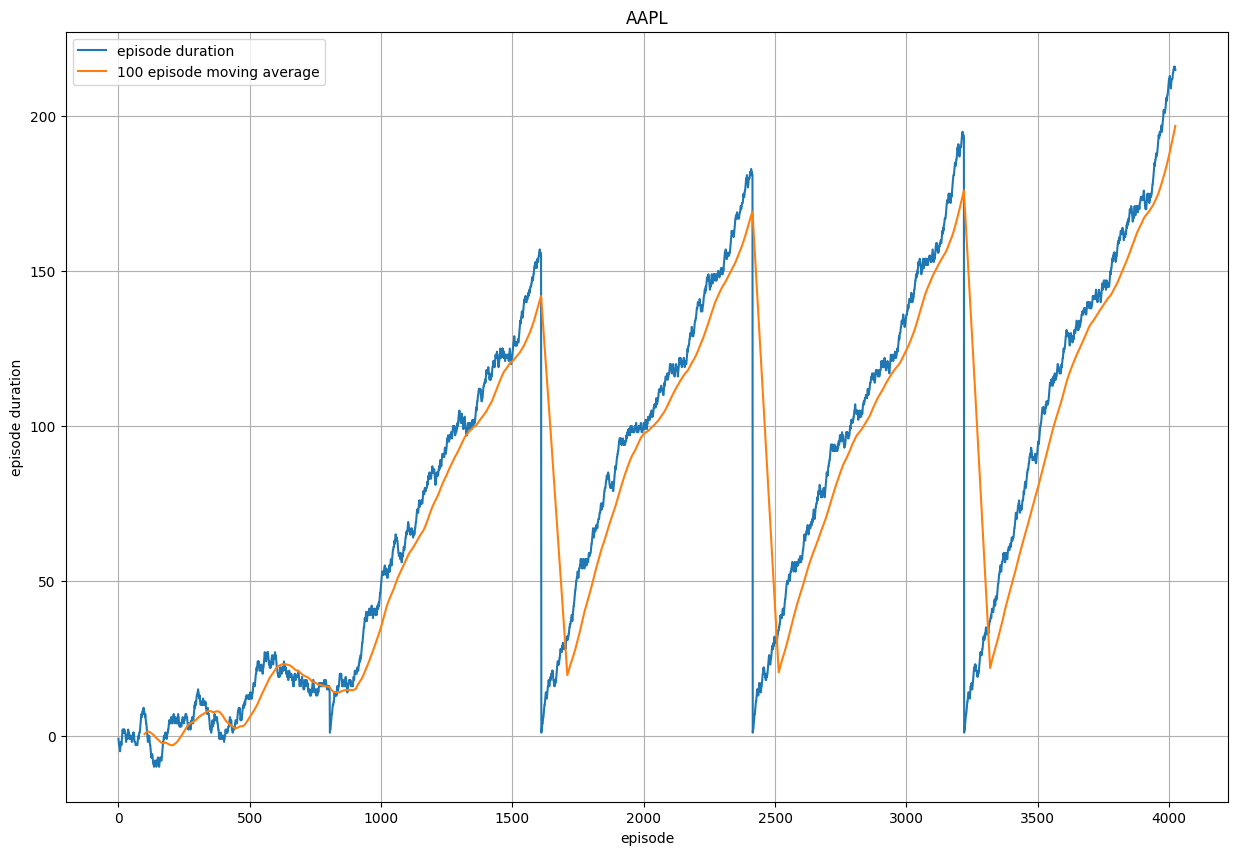

In [85]:
agent.train(episodes=5, continuous=True, plot=True)

In [86]:
act, opt = agent.test()

test score: 0.5900621118012422


In [87]:
mask = ~(act == 2)

In [88]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,

In [89]:
act

array([1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2,
       1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 1, 2])

In [90]:
opt

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [58]:
import plotly.express as px

In [91]:
length = len(agent.env.y_test)

In [92]:
reader = YahooFinanceReader()
price = reader.read_stock_price_data("AAPL")["Close"]

In [93]:
fig = px.scatter(x=np.array(range(length-1))[mask], y=np.array(price[-length+1:])[mask], color=(act==opt)[mask])
fig.show()

In [94]:
fig = px.scatter(x=np.array(range(length-1)), y=np.array(price[-length+1:]), color=act)
fig.show()

## Dyna DQN


In [7]:
# agent = DynaDQNAgent(double_dqn=True,
#                     planning_steps=1,
#                     target_net_update='soft',
#                     tau=0.001,
#                     hard_update_interval=1000,
#                     mem_length=10000,
#                     eps_start=1.0,
#                     eps_end=0.05,
#                     eps_decay_length=1000,
#                     environment='CartPole-v1', 
#                     gradient_clipping=100,
#                     gradient_norm_clipping = -1,
#                     activation='relu',
#                     hidden_size_1=128,
#                     hidden_size_2=128)

In [8]:
# agent.train()